In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from biokit.viz import corrplot
%matplotlib inline
os.chdir('C:/Users/Twentyouts/Desktop')

Creating directory C:\Users\Twentyouts\AppData\Local\biokit\biokit 
Creating directory C:\Users\Twentyouts\AppData\Local\bioservices\bioservices 


In [15]:
df = pd.read_csv('HR_comma_sep.csv')

Why are our best and most experienced employees leaving prematurely? Have fun with this database and try to predict which valuable employees will leave next. Fields in the dataset include:

Last evaluation
Number of projects
Average monthly hours
Time spent at the company
Whether they have had a work accident
Whether they have had a promotion in the last 5 years
Department
Salary
Whether the employee has left

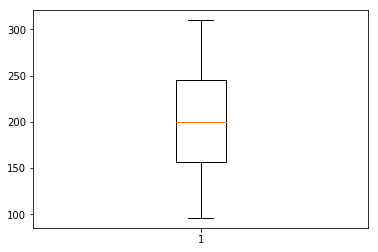

In [31]:
plt.boxplot(df['average_montly_hours'])
plt.show()

We see that working hours in month range between 160 and 240 with outliners to 300 and 100 hours.

In [32]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


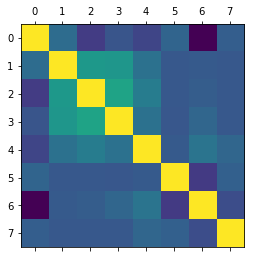

In [35]:
plt.matshow(df.corr())

Is there any handy function to plot correlation matrix?

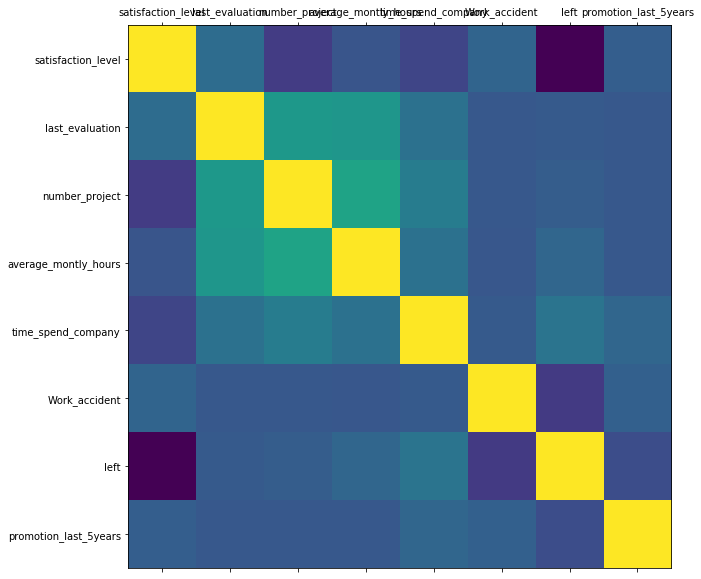

In [49]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(df,size = 10)
plt.show()

C:\Users\Twentyouts\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


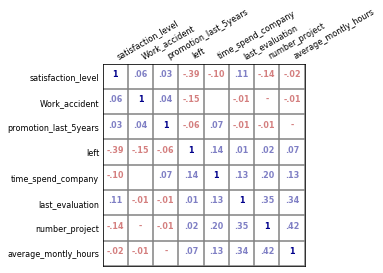

In [50]:
df_corr = df.corr()
c = corrplot.Corrplot(df_corr)
c.plot(method='text', fontsize=8, colorbar=False)

Weak negative correlation beetween satisfaction level and left indicator

C:\Users\Twentyouts\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6198: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


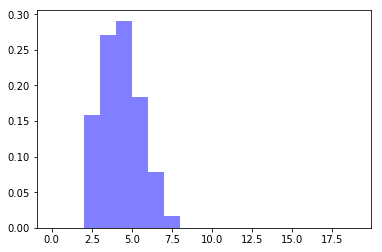

In [64]:
plt.hist(df['average_montly_hours'],color='red',normed = True,bins=np.arange(0, 20),alpha=.5)
plt.hist(df['number_project'],color ='blue',normed = True,bins=np.arange(0, 20),alpha=.5)
plt.show()

Here i tried to plot histograms and compare workin hours and number of projects

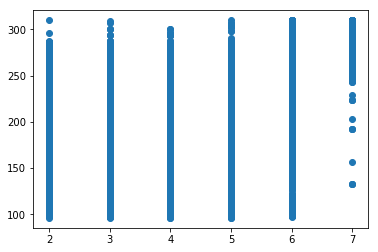

In [66]:
plt.scatter(x = df['number_project'], y = df['average_montly_hours'])
plt.show()

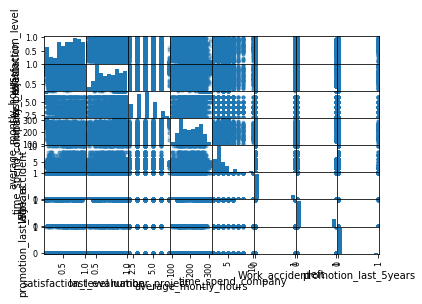

In [70]:
axes = pd.tools.plotting.scatter_matrix(df, alpha=0.2)
plt.show()

Well, i tried to plot scatter_matrix. Similar to pair in R. But it a bit hard to get used. Dont know wich functions to use to plot it correctly

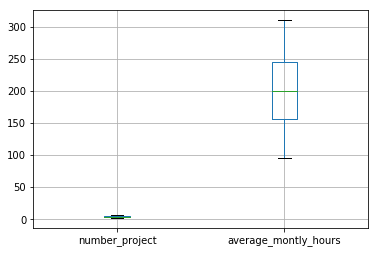

In [72]:
df.boxplot(['number_project','average_montly_hours'])
plt.show()

Well, lets try last thing.

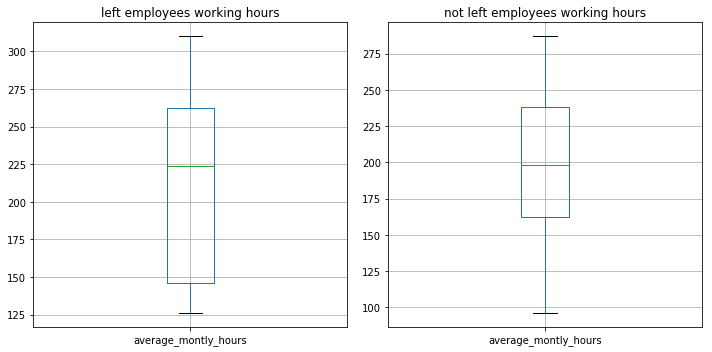

In [77]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df[df['left'] == 1].boxplot(['average_montly_hours'])
plt.title('left employees working hours')

plt.subplot(1, 2, 2)
df[df['left'] == 0].boxplot(['average_montly_hours'])
plt.title('not left employees working hours')

plt.tight_layout()
plt.show()

Only can notice that median value in employes who left 225 workin hours. 
Lets investigate satisfaction level

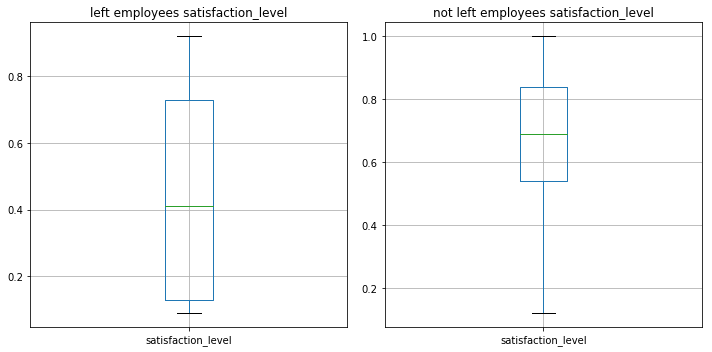

In [79]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df[df['left'] == 1].boxplot(['satisfaction_level'])
plt.title('left employees satisfaction_level')

plt.subplot(1, 2, 2)
df[df['left'] == 0].boxplot(['satisfaction_level'])
plt.title('not left employees satisfaction_level')

plt.tight_layout()
plt.show()

So, left employees work more, and have lower satisfaction level. 
Do left employees promoted less then overs?

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

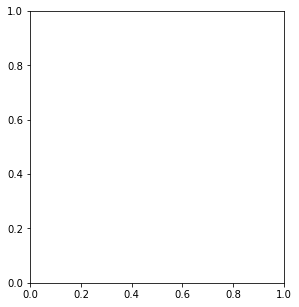

In [81]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df[df['left'] == 1 and df['promotion_last_5years'] == 0].boxplot(['satisfaction_level'])
plt.title('left employees satisfaction_level')

plt.subplot(1, 2, 2)
df[df['left'] == 0 and df['promotion_last_5years'] == 1].boxplot(['satisfaction_level'])
plt.title('not left employees satisfaction_level')

plt.tight_layout()
plt.show()

Something went wrong here

C:\Users\Twentyouts\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Twentyouts\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


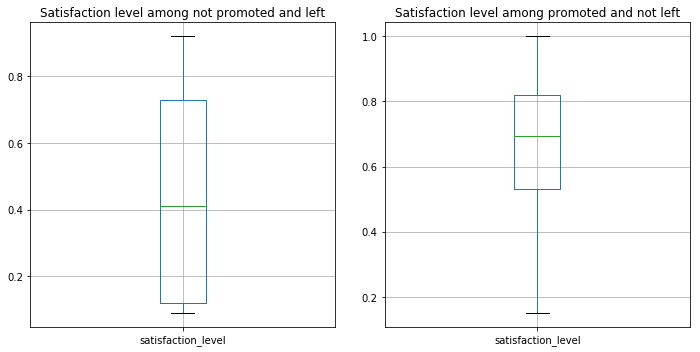

In [85]:
df_left = df[df['left'] == 1]
df_not_left = df[df['left'] == 0]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df_left[df['promotion_last_5years'] == 0].boxplot(['satisfaction_level'])
plt.title('Satisfaction level among not promoted and left')

plt.subplot(1, 2, 2)
df_not_left[df['promotion_last_5years'] == 1].boxplot(['satisfaction_level'])
plt.title('Satisfaction level among promoted and not left')

plt.tight_layout()
plt.show()

Wraping up. Promotion affect on satisfaction level. Left employes who wasn't promoted last five years has lower level of satisfaction ~0.4. Satisfaction level among not left employees is ~0.7. Correlation between left employees and satisfaction is highest beetwen all parameters